In [20]:
import os 
dir = "../05BERT/prediction_log2.txt"

with open(dir, "r") as f:
  data = f.read()

data[:100]  

'Text: Ion Exchange Equilibria and Kinetics\nDOI: 10.1007/978-94-007-1700-8_3\nPublication Date: 2012-0'

In [21]:
import os 
allcount = 12
dir = "../repos/OXIDE/prediction_log_%s.txt"%allcount

with open(dir, "r") as f:
  data = f.read()

data[:100]  
import ast 
import datetime 
each_points = data.strip().split("\n\n")
print(len(each_points))
print(each_points[0])
c1 = 0
c2 = 0
both = 0
titles = []
onlyna = []
onlymain = []
from tqdm import tqdm
el = 0
for points in tqdm(each_points):
  doi_start = points.find("DOI: ")
  pub_start = points.find("Publication Date: ")
  na_start = points.find("Is Nanoparticle: ")
  ma_start = points.find("Main Subject: ")
  
  try:
    text_ = points[:doi_start]
    doi = points[doi_start+len("DOI: ") : pub_start].strip()
    pubdate =points[pub_start+len("Publication Date: ") : na_start].strip()
    is_na = ast.literal_eval( points[na_start+len("Is Nanoparticle: ") : ma_start].strip())
    mainsub = ast.literal_eval( points[ma_start+len("Main Subject: ") : ].strip())
    # if (mainsub != [] and is_na !=[]):
    #   print(mainsub, is_na)
    if (is_na and mainsub):
      both+=1
      titles.append((text_, is_na, mainsub,pubdate,doi))
    elif (is_na):
      onlyna.append((text_, is_na, mainsub))
    elif (mainsub):
      onlymain.append((text_,mainsub))
    else:
      el +=1
  except:
    pass
import json
from collections import defaultdict
import re

dic = {}

def extract_year_from_date(date_str):
    # 정규 표현식을 사용하여 연도 추출
    year_match = re.match(r'^\d{4}', date_str)
    if year_match:
        return int(year_match.group())
    return None

def count_materials_per_year(data):
    for da in data:
        fir = da[1]
        sec = da[2]
        year = extract_year_from_date(da[3])
        for f in fir:
            if f in sec:
                if year not in dic.keys():
                    dic[year] = {f: 1}
                else:
                    if f in dic[year].keys():
                        dic[year][f] += 1
                    else:
                        dic[year][f] = 1
    return dic

# # 함수 호출 및 결과 출력
# year_material_count = count_materials_per_year(titles)

# # 결과 출력
# for year, materials in year_material_count.items():
#     print(f"Year: {year}")
#     for material, count in materials.items():
#         print(f"  Material: {material}, Count: {count}")
# 함수 호출 및 결과 출력
year_material_count = count_materials_per_year(titles)
# tz
# 로그 파일 경로 설정
log_file_path = "./repos/OXIDE/yearly_material_count_log%s.txt"%allcount

# 로그 파일 생성 및 결과 저장
with open(log_file_path, "w") as log_file:
    for year, materials in year_material_count.items():
        log_file.write(f"Year: {year}\n")
        for material, count in materials.items():
            log_file.write(f"  Material: {material}, Count: {count}\n")

print(f"로그 파일이 '{log_file_path}'에 생성되었습니다.")

10000
Text: Ion Exchange Equilibria and Kinetics
DOI: 10.1007/978-94-007-1700-8_3
Publication Date: 2012-01-01
Is Nanoparticle: []
Main Subject: []


100%|██████████| 10000/10000 [00:00<00:00, 60227.51it/s]

['ZnO'] ['ZnO']
['ZnO'] ['ZnO']
['TiO2'] ['TiO2']
['TiO2'] ['TiO2']
['TiO2'] ['TiO2']
['TiO2'] ['TiO2']
['SiO2'] ['SiO2']
['CuO'] ['CuO']
['ZnO'] ['ZnO']
['ZnO'] ['ZnO']
['SiO2'] ['SiO2']
['SiO2'] ['SiO2']
['TiO2'] ['TiO2']
['SiO2'] ['SiO2']
['CuO'] ['CuO']
['TiO2'] ['TiO2']
['CuO'] ['CuO']
['ZnO'] ['ZnO']
['SiO2'] ['SiO2']
['Al2O3'] ['Al2O3']
['SiO2', 'TiO2'] ['SiO2', 'TiO2']
['ZnO', 'TiO2'] ['TiO2']
['TiO2'] ['TiO2']
['SiO2'] ['SiO2']
['SiO2'] ['SiO2']
['SiO2'] ['SiO2']
['TiO2'] ['TiO2']
['TiO2'] ['TiO2']
['ZnO'] ['ZnO']
['ZnO'] ['ZnO']
['CuO'] ['CuO']
['SiO2'] ['SiO2']
['SiO2'] ['SiO2']
['TiO2'] ['TiO2']
['CuO'] ['CuO']
['SiO2', 'TiO2'] ['TiO2']
['SiO2'] ['SiO2']
['ZnO'] ['ZnO']
['ZnO'] ['ZnO']
['ZnO'] ['ZnO']
['CuO'] ['CuO']
['Al2O3'] ['Al2O3']
['TiO2'] ['TiO2']
['SiO2'] ['SiO2']
['SiO2'] ['SiO2']
['SiO2'] ['SiO2']
['Al2O3'] ['Al2O3']
['Al2O3'] ['Al2O3']
['SiO2'] ['SiO2']
['ZnO'] ['ZnO']
['TiO2'] ['TiO2']
['CuO'] ['CuO']
['SiO2'] ['SiO2']
['TiO2'] ['TiO2']
['SiO2'] ['SiO2']
['TiO2'

In [16]:
onlymain

[('Text:                   Alyssum turkestanicum Regel et Schmalh. (A. desertorum Stapf)\n',
  ['Al2O3']),
 ('Text: Tetranuclear hydroxo-bridged copper(II) cluster of the Z type: Preparation and structural and magnetic characterization of [(Cu_4bipy_4(OH)_4(B_10H_10)_2(DMSO)_2]\n',
  ['CuO']),
 ('Text: Influence of powder surface area on the magnetoelectric effect in barium lead zirconate titanate/nickel ferrite composite ceramics\n',
  ['SiO2']),
 ('Text: Modeling Silicon Nanostructure Surface Functionalization for Biological Detections\n',
  ['SiO2']),
 ('Text: Synthesis of a magnesium aluminum spinel by the burning method\n',
  ['Al2O3']),
 ('Text:             Aleurites triloba Forst.\n', ['SiO2']),
 ('Text:             Tithonia spesiosa          \n', ['SiO2']),
 ('Text: Luca Prodi, Marco Montalti and Nelsi Zaccheroni (Eds.): Luminescence applied in sensor science\n',
  ['SiO2']),
 ('Text: Preparation of ultra high molecular weight polyethylene with MgCl_2/TiCl_4 catalyst: Effect of

In [17]:
len(titles)

115

In [22]:
import json
from collections import defaultdict
import re

dic = {}

def extract_year_from_date(date_str):
    # 정규 표현식을 사용하여 연도 추출
    year_match = re.match(r'^\d{4}', date_str)
    if year_match:
        return int(year_match.group())
    return None

def count_materials_per_year(data):
    for da in data:
        fir = da[1]
        sec = da[2]
        year = extract_year_from_date(da[3])
        for f in fir:
            if f in sec:
                if year not in dic.keys():
                    dic[year] = {f: 1}
                else:
                    if f in dic[year].keys():
                        dic[year][f] += 1
                    else:
                        dic[year][f] = 1
    return dic

# # 함수 호출 및 결과 출력
# year_material_count = count_materials_per_year(titles)

# # 결과 출력
# for year, materials in year_material_count.items():
#     print(f"Year: {year}")
#     for material, count in materials.items():
#         print(f"  Material: {material}, Count: {count}")
# 함수 호출 및 결과 출력
year_material_count = count_materials_per_year(titles)
# tz
# 로그 파일 경로 설정
log_file_path = "./yearly_material_count_log34.txt"

# 로그 파일 생성 및 결과 저장
with open(log_file_path, "w") as log_file:
    for year, materials in year_material_count.items():
        log_file.write(f"Year: {year}\n")
        for material, count in materials.items():
            log_file.write(f"  Material: {material}, Count: {count}\n")

print(f"로그 파일이 '{log_file_path}'에 생성되었습니다.")

로그 파일이 './yearly_material_count_log34.txt'에 생성되었습니다.


0
0
0
0
0
0
1
1
1
1
1
1
2
2
2
2
2
2
3
3
3
3
3
3
4
4
4
4
4
4
5
5
5
5
5
5
6
6
6
6
6
6
7
7
7
7
7
7
8
8
8
8
8
8
9
9
9
9
9
9
10
10
10
10
10
10
11
11
11
11
11
11
12
12
12
12
12
12
13
13
13
13
13
13
14
14
14
14
14
14
15
15
15
15
15
15
16
16
16
16
16
16
17
17
17
17
17
17
18
18
18
18
18
18
19
19
19
19
19
19
20
20
20
20
20
20
21
21
21
21
21
21
22
22
22
22
22
22
23
23
23
23
23
23
24
24
24
24
24
24
25
25
25
25
25
25
26
26
26
26
26
26
27
27
27
27
27
27
28
28
28
28
28
28
29
29
29
29
29
29
30
30
30
30
30
30
31
31
31
31
31
31


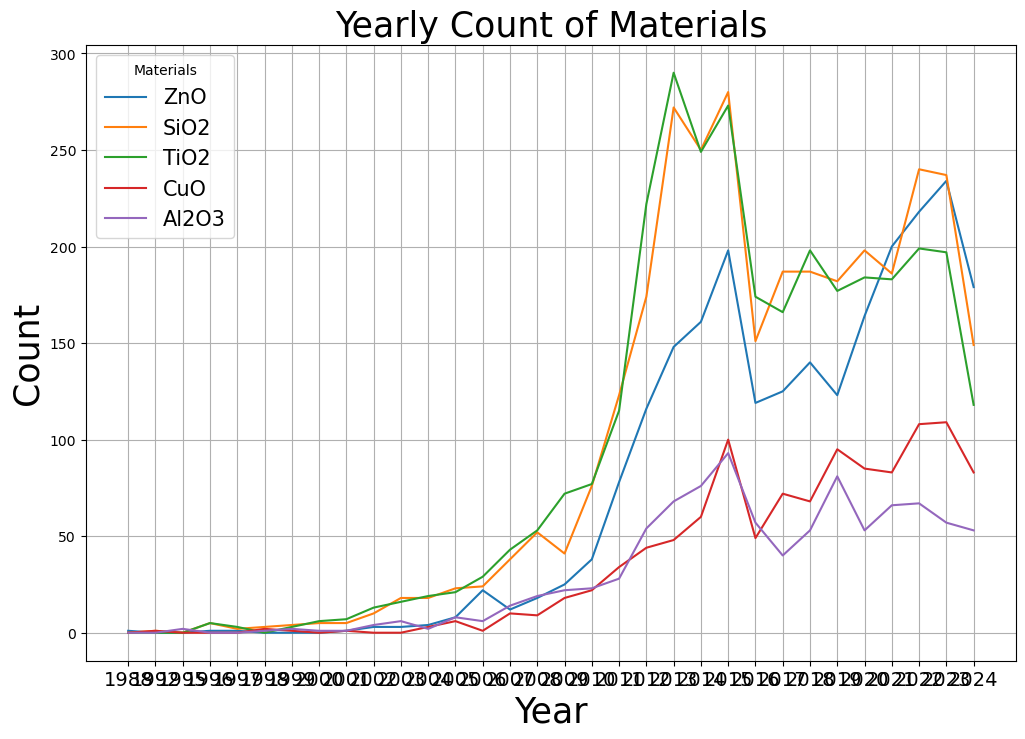

{'Year': ['1988',
  '1997',
  '1996',
  '1995',
  '1992',
  '2015',
  '2014',
  '2021',
  '2020',
  '2011',
  '2010',
  '2009',
  '2008',
  '2007',
  '2006',
  '2005',
  '2004',
  '2003',
  '2002',
  '2001',
  '2000',
  '1999',
  '1998',
  '2024',
  '2023',
  '2022',
  '2013',
  '2012',
  '2019',
  '2018',
  '2017',
  '2016'],
 'ZnO': [1,
  1,
  1,
  0,
  0,
  198,
  161,
  200,
  164,
  78,
  38,
  25,
  18,
  12,
  22,
  8,
  4,
  3,
  3,
  1,
  0,
  0,
  0,
  179,
  234,
  218,
  148,
  116,
  123,
  140,
  125,
  119],
 'SiO2': [0,
  2,
  5,
  0,
  1,
  280,
  250,
  186,
  198,
  123,
  76,
  41,
  52,
  38,
  24,
  23,
  18,
  18,
  10,
  5,
  5,
  4,
  3,
  149,
  237,
  240,
  272,
  174,
  182,
  187,
  187,
  151],
 'TiO2': [0,
  3,
  5,
  0,
  0,
  273,
  249,
  183,
  184,
  115,
  77,
  72,
  53,
  43,
  29,
  21,
  19,
  16,
  13,
  7,
  6,
  3,
  0,
  118,
  197,
  199,
  290,
  222,
  177,
  198,
  166,
  174],
 'CuO': [0,
  0,
  0,
  0,
  1,
  100,
  60,
  83,
  85,
  

In [60]:
log_file_path = "./yearly_material_count_log962399.txt"

# 로그 파일 생성 및 결과 저장
with open(log_file_path, "r") as log_file:
  data2 =log_file.read()
import matplotlib.pyplot as plt
import pandas as pd

# Parse the raw data
data = {
    "Year": [],
    "ZnO": [],
    "SiO2": [],
    "TiO2": [],
    "CuO": [],
    "Al2O3": []
}
materials = data.keys()
lines = data2.strip().split("\n")
rawdata = data2.strip().split("Year: ")[1:]
for year_data in rawdata:
    # print(data)
    for key, value in data.items():
        print(len(value), sep = "")
    d = year_data.split("\n")
    year = d[0].strip()
    data["Year"].append(year)
    data["ZnO"].append(0)
    data["SiO2"].append(0)
    data["TiO2"].append(0)
    data["CuO"].append(0)
    data["Al2O3"].append(0)
    materials_data = d[1:]
    for material_data in materials_data:
        a = material_data.split(", ")
        if len(a)>1:
            mat_info = a[0].replace("Material: ", "").strip()
            count_info = int(a[1].replace("Count: ", "").strip())
            index = data["Year"].index(year)
            data[mat_info][index] = count_info
            # print(mat_info, count_info)

# print(data)
# current_year = None
# charge = []
# for line in lines:
#     line = line.strip()
#     if line.startswith("Year:"):
#         current_year = int(line.split(":")[1].strip())
#         data["Year"].append(current_year)

#     elif line.startswith("Material:"):
#         parts = line.split(",")
#         material = parts[0].split(":")[1].strip()
#         charge.append(material)
#         count = int(parts[1].split(":")[1].strip())
#         data[material].append(count)
# # print(data)
# # Convert data to DataFrame
df = pd.DataFrame(data)
df = df.sort_values("Year")
# Plotting
plt.figure(figsize=(12, 8))

for material in ['ZnO', 'SiO2', 'TiO2', 'CuO', 'Al2O3']:
    plt.plot(df['Year'], df[material], label=material)
    # , marker='o'
# plt.xlim(1999, 2025)
import numpy as np
# plt.xticks(rotate =)
plt.xlabel('Year',fontsize = 25)
plt.ylabel('Count',fontsize = 25)
plt.title('Yearly Count of Materials',fontsize = 25)
plt.legend(title='Materials',fontsize = 15)
plt.xticks(fontsize = 14)
plt.grid(True)
plt.show()
data

In [55]:
df

,Year,ZnO,SiO2,TiO2,CuO,Al2O3
0,1988,1,0,0,0,0
1,1997,1,2,3,0,0
2,1996,1,5,5,0,0
3,1995,0,0,0,0,2
4,1992,0,1,0,1,0
5,2015,198,280,273,100,93
6,2014,161,250,249,60,76
7,2021,200,186,183,83,66
8,2020,164,198,184,85,53
9,2011,78,123,115,34,28


In [79]:
# 함수 호출 및 결과 출력
year_material_count = count_materials_per_year(data)

# 결과 출력
for year, materials in year_material_count.items():
    print(f"Year: {year}")
    for material, count in materials.items():
        print(f"  Material: {material}, Count: {count}")

IndexError: string index out of range

In [ ]:
year_material_count

defaultdict(<function __main__.count_materials_per_year.<locals>.<lambda>()>,
            {})

In [27]:
onlymain[:5]

[('Text: Electrocatalytic performance of a nickel(II) phthalocyanine-carbon nanotube composite towards the detection of Hg^2+ ions',
  ['CuO']),
 ('Text: Cauliflower Cu_2ZnSnS_4:Na film prepared by single-pot hydrothermal approach for photovoltaic application: impact of NaOH additive',
  ['CuO']),
 ('Text: Selective electrochemical detection of chromium ions in water samples by poly (rutin)/carbon black-chitosan nanocomposite-modified glassy carbon electrode',
  ['TiO2']),
 ('Text: Enhanced voltammetric sensing platform based on gold nanorods and electrochemically reduced graphene oxide for As(III) determination in seafood samples',
  ['CuO']),
 ('Text: Analysis of CO selectivity during electroreduction of CO_2 in deep eutectic solvents by machine learning',
  ['CuO'])]